In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#İhtiyacımız olan Python Kütüphaneleri import edildi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve

%matplotlib inline

In [3]:
dataFile=pd.read_csv('kalp2.csv')
dataFile.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Verisetinin matris boyutu
print('Veri Setindeki Satır Sayısı: ', dataFile.shape[0])
print('Veri Setindeki Sütun Sayısı: ', dataFile.shape[1])

Veri Setindeki Satır Sayısı:  303
Veri Setindeki Sütun Sayısı:  14


In [6]:
#Satır ve sütun sayısı
dataFile.shape

(303, 14)

In [7]:
dataFile.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Veri setinden çeşitli sonuçlar elde ediyoruz.(Ortalama vs.)
dataFile.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


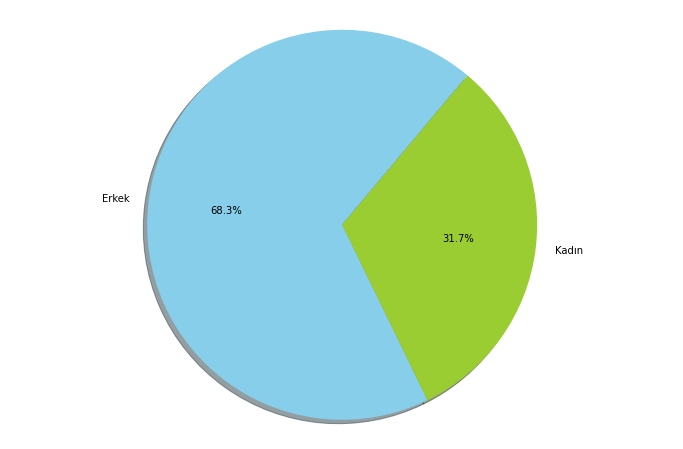

In [9]:
Erkek =len(dataFile[dataFile['sex'] == 1])
Kadın = len(dataFile[dataFile['sex']== 0])

plt.figure(figsize=(12,8))

labels = 'Erkek','Kadın'
sizes = [Erkek,Kadın]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=50)

plt.axis('equal')
plt.show()

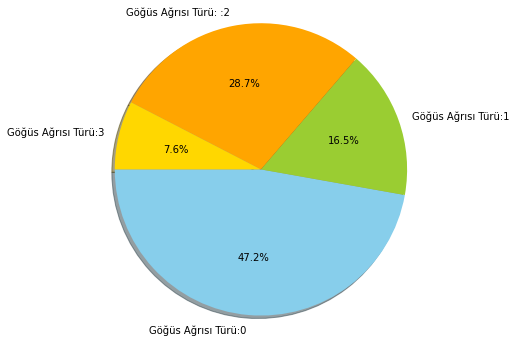

In [10]:
plt.figure(figsize=(8, 6))

labels = 'Göğüs Ağrısı Türü:0', 'Göğüs Ağrısı Türü:1', 'Göğüs Ağrısı Türü: :2', 'Göğüs Ağrısı Türü:3'
sizes = [len(dataFile[dataFile['cp'] == 0]),
         len(dataFile[dataFile['cp'] == 1]),
         len(dataFile[dataFile['cp'] == 2]),
         len(dataFile[dataFile['cp'] == 3])]
colors = ['skyblue', 'yellowgreen', 'orange', 'gold']
explode = (0, 0, 0, 0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.axis('equal')
plt.show()

ValueError: 'explode' must be of length 'x'

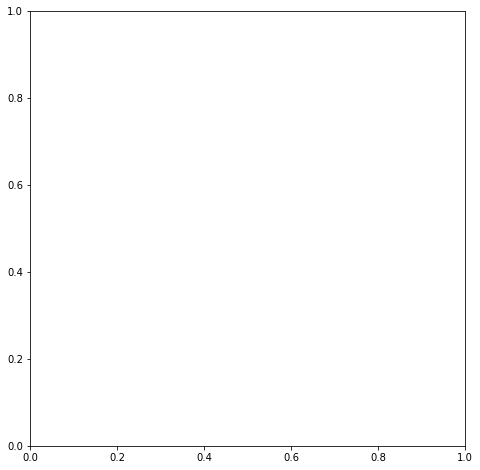

In [11]:
plt.figure(figsize=(12,8))

etiketler = 'Kan Şekeri  < 120 mg/dl', 'Kan şekeri > 120 mg/dl'
boyutlar =[len(dataFile[dataFile['fbs'] == 0]),
          len(dataFile[dataFile['cp'] == 1])]
renkler =['skyblue', 'yellowgreen', 'orange', 'gold']
explode = (0, 1, 0)

plt.pie(boyutlar, explode = explode, labels = etiketler, colors = renkler, autopct = '%1.1f%%', shadow = True, startangle = 180)

plt.axis('equal')
plt.show()

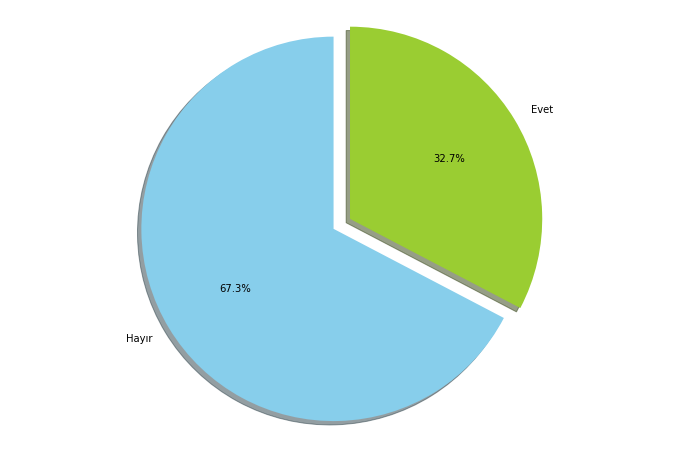

In [12]:
plt.figure(figsize =(12,8))

etiketler = 'Hayır', 'Evet'
boyutlar = [len(dataFile[dataFile['exang'] == 0]),
           len(dataFile[dataFile['exang'] == 1])]
renkler = ['skyblue', 'yellowgreen']
explode = (0.1, 0)

plt.pie(boyutlar, explode = explode, labels = etiketler, colors = renkler, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal')
plt.show()

In [13]:
sns.set_style('whitegrid')

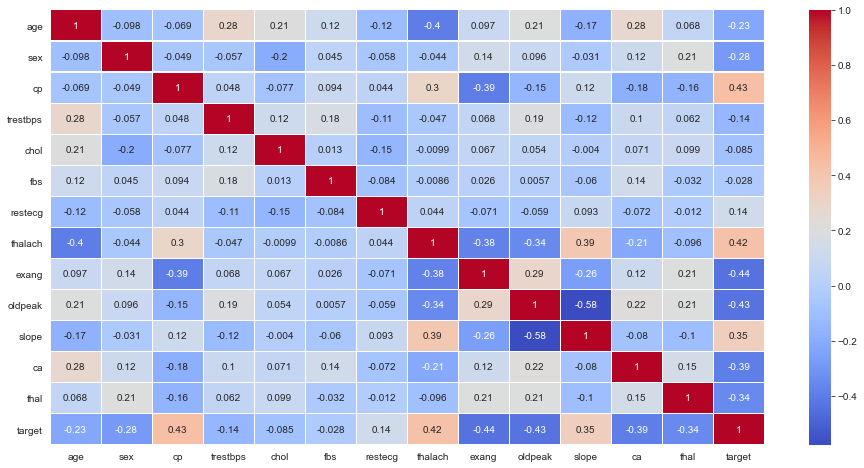

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(dataFile.corr(), annot = True, cmap = 'coolwarm', linewidths = .1)
plt.show()

<AxesSubplot:xlabel='thalach'>

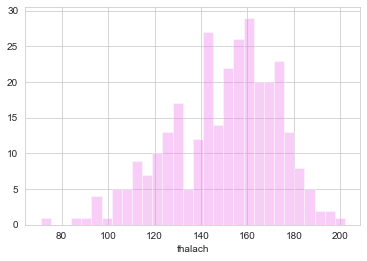

In [15]:
sns.distplot(dataFile['thalach'], kde = False, bins = 30, color = 'violet')

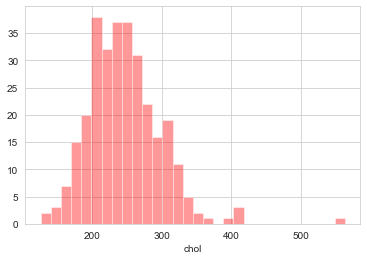

In [16]:
sns.distplot(dataFile['chol'],  kde = False, bins = 30, color = 'red')
plt.show()

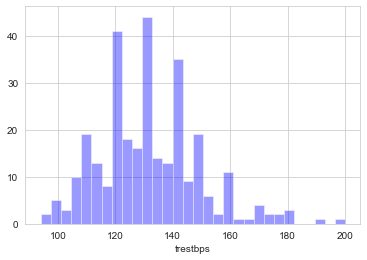

In [17]:
sns.distplot(dataFile['trestbps'], kde = False, bins = 30, color = 'blue')
plt.show()

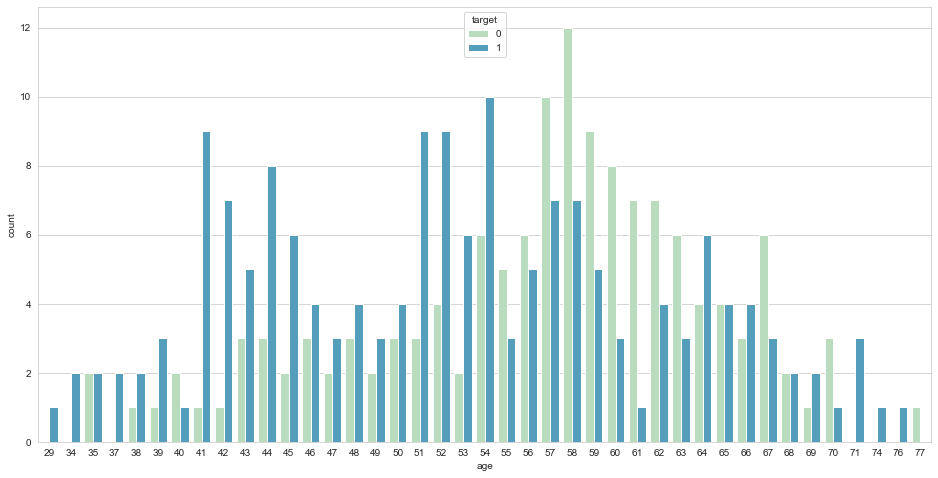

In [18]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'age', data = dataFile, hue = 'target', palette = 'GnBu')
plt.show()

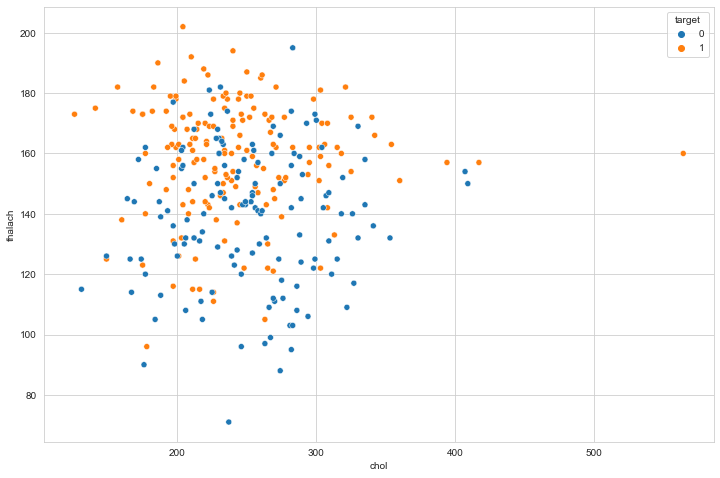

In [19]:
plt.figure(figsize =(12,8))
sns.scatterplot(x = 'chol', y = 'thalach', data = dataFile, hue = 'target')
plt.show()

In [20]:
X = dataFile.drop('target', axis = 1)
y = dataFile['target']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
#Normalizasyon işlemi
scaler = MinMaxScaler(feature_range =(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1, 33, 2)]}

In [25]:
model = GridSearchCV(knn, params, cv = 10)

In [26]:
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 7}

In [34]:
predict = model.predict(X_test)
predict

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Doğruluk oranı:', accuracy_score(y_test, predict))
print('k-NN algoritmasını kullanarak yapılan modelin tahmin oranı :', 
     round(accuracy_score(y_test, predict), 5)*100, '%')

Doğruluk oranı: 0.8131868131868132
k-NN algoritmasını kullanarak yapılan modelin tahmin oranı : 81.319 %


In [36]:
cnf_matrix = confusion_matrix(y_test, predict)
cnf_matrix

array([[33,  8],
       [ 9, 41]], dtype=int64)

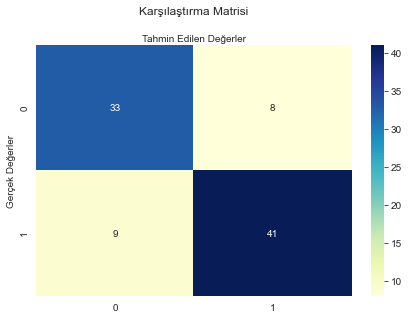

In [30]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Karşılaştırma Matrisi', y = 1.1)
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

In [37]:
fpr,tpr,thresholds=roc_curve(y_test,predict[:])

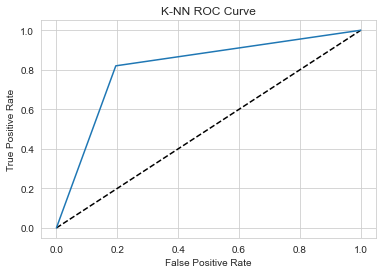

In [38]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="K-NN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-NN ROC Curve")
plt.show()